## Haberman Breast cancer classifiction with KNN

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In this notebook I have trainded a model using KNN algorithm and try to find the best value of K to predict the survial of the patient

### Data
Downloaded the census data file from UCI Machine Learning 
repository http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/ 
it is in the file haberman.data

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1. 1 = the patient survived 5 years or longer
         2. 2 = the patient died within 5 year
         
The target is survival of the patient.


## Import the python libs

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import neighbors, preprocessing, model_selection
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

## Import the data

In [2]:
# 1. Importing the data from the csv file downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/
df = pd.read_csv("haberman.data",names=['age','year','positive_axillary_nodes','survival_status'])
df.head(15)

,age,year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


## Process data
Removing all the Null values and extracting the traget variable from the data

In [3]:
# 2. removing null NaN values from dataframe
df = df.dropna(axis=0, how='any')
print(df.dtypes)
X = (df.drop(['survival_status'],1)).values
Y = df['survival_status'].values
print('X Shape %s Y Shape ' % str(X.shape), str(Y.shape))

age                        int64
year                       int64
positive_axillary_nodes    int64
survival_status            int64
dtype: object
('X Shape (306L, 3L) Y Shape ', '(306L,)')


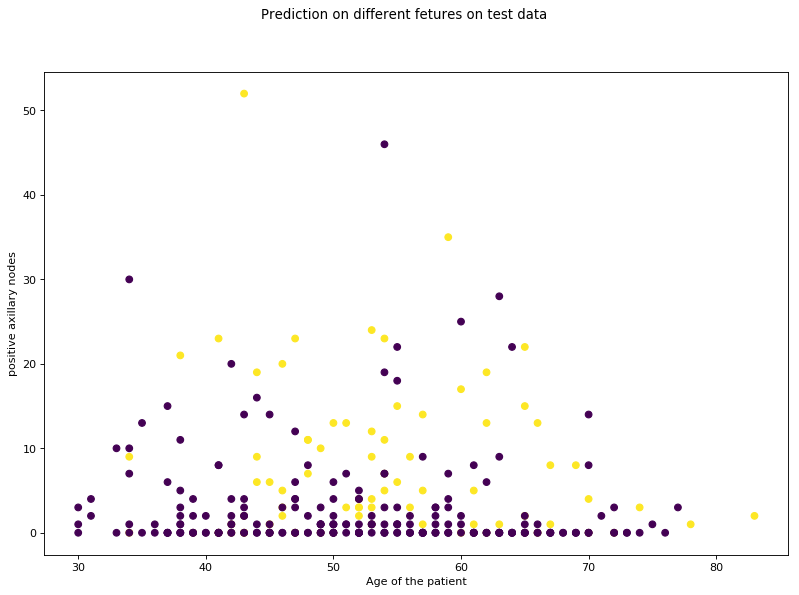

In [4]:
#Plotting the data points with age and axxilary nodes
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.figure(1)
plt.suptitle('Prediction on different fetures on test data')
plt.scatter(X[:,0],X[:,2],c=Y)
plt.xlabel('Age of the patient')
plt.ylabel('positive axillary nodes')
plt.show()

## Split the data into train [80%] and test [20%] data

In [5]:
np.random.seed(1)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.20)
print('Train Shape : %s '%str(X_train.shape),str(Y_train.shape))
print('Test Shape : %s '%str(X_test.shape),str(Y_test.shape))

('Train Shape : (244L, 3L) ', '(244L,)')
('Test Shape : (62L, 3L) ', '(62L,)')


## Train KNN algorithm
Let us train the KNN with default K value

In [6]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train,Y_train)
prediction = knn.predict(X_test)
print(prediction)
accuracyTrain=knn.score(X_train,Y_train)
accuracyTest=knn.score(X_test,Y_test)
print("accuracyTrain : "+str(accuracyTrain))
print("accuracyTest : "+str(accuracyTest))

[1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 1 2 1 1 1 1 1 2 1 2]
accuracyTrain : 0.7950819672131147
accuracyTest : 0.7258064516129032


## We will try with different values of K and check the accuracy

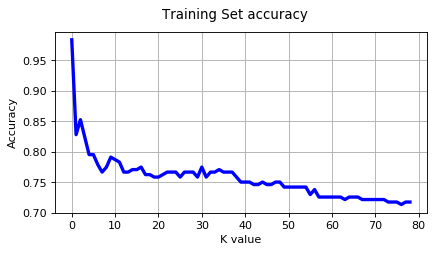

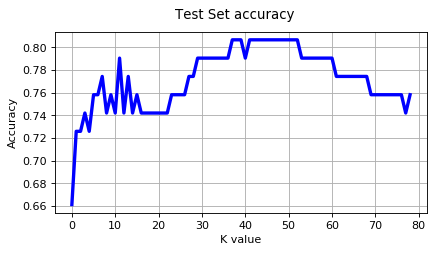

K Value with max test set accuracy: 38, Max test set accuracy : 0.8064516129032258
Train set accuracy for K : 38, is : 0.7581967213114754


In [7]:
trainAcc = []
testAcc = []
k_of_max_test_accuracy = -1
max_test_accuracy = 0
for k in range (1, 80):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,Y_train)
    train_acc = knn.score(X_train,Y_train)
    trainAcc.append(train_acc)
    test_acc = knn.score(X_test,Y_test)
    testAcc.append(test_acc)
    if(test_acc > max_test_accuracy) :
        max_test_accuracy = test_acc
        k_of_max_test_accuracy = k
figure(num=None, figsize=(6, 3), dpi=80, facecolor='w', edgecolor='k')
plt.figure(1)
plt.suptitle('Training Set accuracy')
plt.plot(trainAcc, color='blue',linewidth=3.0)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
figure(num=None, figsize=(6, 3), dpi=80, facecolor='w', edgecolor='k')
plt.figure(2)
plt.suptitle('Test Set accuracy')
plt.plot(testAcc, color='blue',linewidth=3.0)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

print("K Value with max test set accuracy: "+str(k_of_max_test_accuracy)+", Max test set accuracy : "+ str(max_test_accuracy))
print("Train set accuracy for K : "+str(k_of_max_test_accuracy)+", is : "+ str(trainAcc[k_of_max_test_accuracy]))

### Conclusion
We can derive from the above graph that as the value of K increases the accuracy on the training set decreases, but the accuracy on the test set increases after certain value of K the test accuracy decreases again.

So initially with lower value of K our model was having high variance as it was having 100 % accuracy on the training set and 0% accuracy on test set.

As the value of K went on increasing the variance reduced after certian value of K it started to have bias so the accuracy on test again started to reduce.